In [1]:
import pandas as pd
import numpy as np
from perceptron import PocketPerceptron
import matplotlib.pyplot as plt

In [2]:
blobs = pd.read_csv('../data/blobs2.csv')

In [3]:
blobs.loc[blobs.label == 0, 'label'] = -1

# 2

In [4]:
perceptron = PocketPerceptron(max_iterations=50, early_stop=True)

In [5]:
perceptron.fit(blobs[['x', 'y']].values, blobs.label.values)

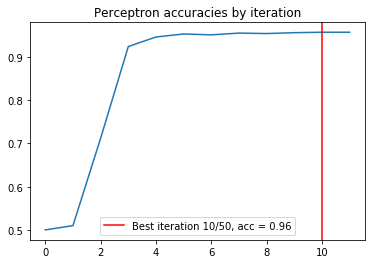

In [6]:
plt.title('Perceptron accuracies by iteration')
plt.plot(perceptron.accuracies)
best = np.argmax(perceptron.accuracies)
plt.axvline(best, c='red', label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
plt.legend()

In [7]:
def y_2d(x, w0, w1, w2):
    return (-w1*x - w0) / w2

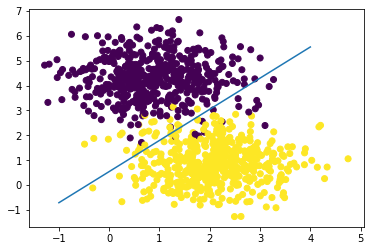

In [8]:
plt.scatter(blobs.x, blobs.y, c=blobs.label)
plt.plot([-1, 4], [y_2d(-1, *perceptron.weights), y_2d(4, *perceptron.weights)])

# 3

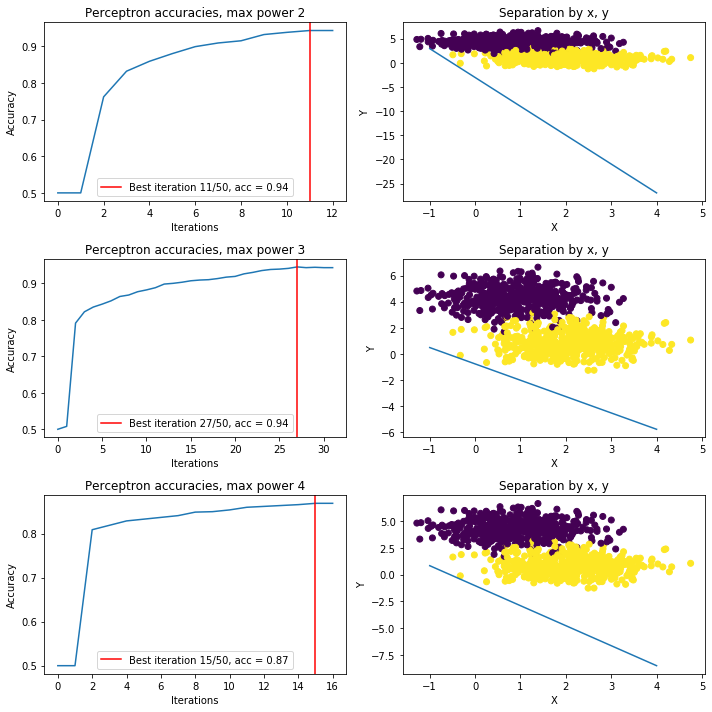

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i, power in enumerate(range(2, 5)):
    blobs[f'x_{power}'], blobs[f'y_{power}'] = blobs.x**power, blobs.y**power
    perceptron = PocketPerceptron(max_iterations=50, early_stop=True)
    perceptron.fit(blobs.drop(['label'], axis=1).values, blobs.label.values)
    
    ax[i, 0].set_title(f'Perceptron accuracies, max power {power}')
    ax[i, 0].set_xlabel('Iterations')
    ax[i, 0].set_ylabel('Accuracy')
    ax[i, 0].plot(perceptron.accuracies)
    best = np.argmax(perceptron.accuracies)
    ax[i, 0].axvline(best, c='red', 
                     label=f'Best iteration {best}/{perceptron.max_iterations}, acc = {max(perceptron.accuracies):.2f}')
    ax[i, 0].legend()
    ax[i, 1].scatter(blobs.x, blobs.y, c=blobs.label)
    ax[i, 1].set_xlabel('X')
    ax[i, 1].set_ylabel('Y')
    ax[i, 1].set_title('Separation by x, y')
    ax[i, 1].plot([-1, 4], [y_2d(-1, *perceptron.weights[:3]), y_2d(4, *perceptron.weights[:3])], label='Weight line')
    
plt.tight_layout()